# Pytorch MNIST for Deep learning HW1
## Requirements (following must be installed)
- Pytorch cuda and torchvision
- matplotlib
- tqdm

The code was tested on the following system and may not run if any configuration is different. This code only works on cuda and may not run on non-nvidia GPUs.
- Pop OS 22.04 (Ubuntu based)
- NVIDIA RTX 3060 Laptop GPU with driver 525.89.02
- Pytorch 1.6
- miniconda environment python 3.10
- Atleast 2GB VRAM needed as the script loads the dataset directly to video memory.
- Used VScode jupyter environment.

## References
- https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
- https://pytorch.org/tutorials/beginner/basics/intro.html
- https://tqdm.github.io/

In [1]:
import torch, torch.utils.data
from torch import nn
import torchvision, torchvision.datasets
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

/mnt/ssd/Projects/pytoch-mnist/.conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda')
torch.cuda.get_device_name(device)

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
target_transform = lambda x: torch.nn.functional.one_hot(torch.tensor(x),10)

In [4]:
train_dataset = torchvision.datasets.MNIST('datasets/', download=True, train=True, transform=transform, target_transform=target_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000000, num_workers=16)
test_dataset = torchvision.datasets.MNIST('datasets/', download=True, train=False, transform=transform, target_transform=target_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000000, num_workers=16)

In [5]:
train_data = list(train_loader)
train_x, train_y = train_data[0]
train_x = train_x.to(device).type(torch.cuda.FloatTensor)
train_y= train_y.to(device).type(torch.cuda.FloatTensor)
del train_data

In [6]:
test_data = list(test_loader)
test_x, test_y = test_data[0]
test_x = test_x.to(device).type(torch.cuda.FloatTensor)
test_y= test_y.to(device).type(torch.cuda.FloatTensor)
del test_data

In [7]:
network = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,56),
    nn.ReLU(),
    nn.Linear(56, 10)
).to(device)
optimizer = torch.optim.Adam(network.parameters())

In [8]:
losses_train=[]
losses_test = []
for i in tqdm(range(2000)):
    output = network(train_x)
    optimizer.zero_grad()
    loss = nn.functional.mse_loss(output, train_y)
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        output = network(train_x)
        train_loss = nn.functional.mse_loss(output, train_y).item()
        output = network(test_x)
        test_loss = nn.functional.mse_loss(output, test_y).item()
        losses_train.append(train_loss)
        losses_test.append(test_loss)

        


100%|██████████| 2000/2000 [00:19<00:00, 100.53it/s]


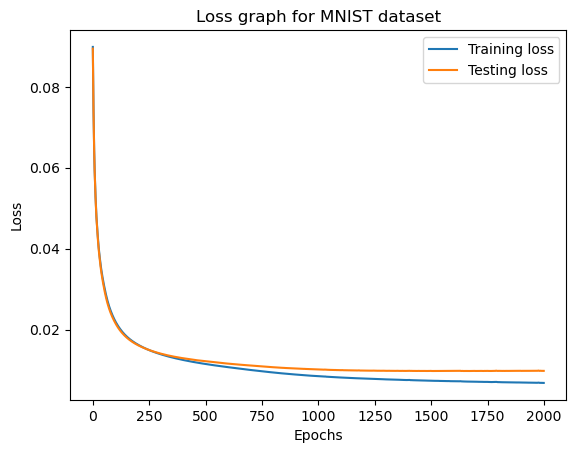

In [9]:
plt.plot(losses_train, label="Training loss")
plt.plot(losses_test, label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss graph for MNIST dataset")
plt.legend()